In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import sklearn
import keras
from keras.models import Sequential
import cv2
from skimage import io
% matplotlib inline

Using Theano backend.
1 #define _CUDA_NDARRAY_C
2 
3 #include <Python.h>
4 #include <structmember.h>
5 #include "theano_mod_helper.h"
6 
7 #include <numpy/arrayobject.h>
8 #include <iostream>
9 
10 #include "cuda_ndarray.cuh"
11 
12 #ifndef CNMEM_DLLEXPORT
13 #define CNMEM_DLLEXPORT
14 #endif
15 
16 #include "cnmem.h"
17 #include "cnmem.cpp"
18 
19 //If true, when there is a gpu malloc or free error, we print the size of allocated memory on the device.
20 #define COMPUTE_GPU_MEM_USED 0
21 
22 //If true, we fill with NAN allocated device memory.
23 #define ALLOC_MEMSET 0
24 
25 //If true, we print out when we free a device pointer, uninitialize a
26 //CudaNdarray, or allocate a device pointer
27 #define PRINT_FREE_MALLOC 0
28 
29 //If true, we do error checking at the start of functions, to make sure there
30 //is not a pre-existing error when the function is called.
31 //You probably need to set the environment variable
32 //CUDA_LAUNCH_BLOCKING=1, and/or modify the CNDA_THREAD_SYNC
33

nvcc fatal   : Cannot find compiler 'cl.exe' in PATH

['nvcc', '-shared', '-O3', '-Xlinker', '/DEBUG', '-D HAVE_ROUND', '-m64', '-Xcompiler', '-DCUDA_NDARRAY_CUH=mc72d035fdf91890f3b36710688069b2e,-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION,/Zi,/MD', '-IC:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\lib\\site-packages\\theano\\sandbox\\cuda', '-IC:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\lib\\site-packages\\numpy\\core\\include', '-IC:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\include', '-IC:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\lib\\site-packages\\theano\\gof', '-o', 'C:\\Users\\junfeng\\AppData\\Local\\Theano\\compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-3.4.4-64\\cuda_ndarray\\cuda_ndarray.pyd', 'mod.cu', '-LC:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\libs', '-LC:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64', '-lcublas', '-lpython34', '-lcudart']


In [2]:
print(cv2.__version__)

3.1.0


# define the file path

In [4]:
cat = os.listdir("/mmt/hdd/datasets/dogs_cats/train/cat")
dog = os.listdir("/mmt/hdd/datasets/dogs_cats/train/dog")
filepath = "/mmt/hdd/datasets/dogs_cats/train/cat"
filepath2 = "/mmt/hdd/datasets/dogs_cats/train/dog"

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/mmt/hdd/datasets/dogs_cats/train/cat'

# load the images

In [5]:
images = []
label = []
for i in cat:
    image = scipy.misc.imread(filepath + i)
    images.append(image)
    label.append(0) # for cat image
for i in dog:
    image = scipy.misc.imread(filepath2 + i)
    images.append(image)
    label.append(1) # for dog images

NameError: name 'cat' is not defined

# resizing all the images 
- press 'ESC' + M or Y to shift between code and Markdown mode

In [6]:
for i in range(0, 23000):
    images[i] = cv2.imresize(images[i], (300,300))

AttributeError: 'module' object has no attribute 'imresize'

# converting images to array 

In [7]:
images = np.array(images)
label = np.array(label)

# defining the hyperparameters


In [8]:
filters = 10
filtersize = (5,5)

epochs = 5
batchsize = 128

input_shape = (300,300,3)


# Converting the target variable to required size

In [9]:
from keras.utils.np_utils import to_categorical
label = to_categorical(label)

ValueError: zero-size array to reduction operation maximum which has no identity

# defining the model


In [12]:
model = Sequential()

model.add(keras.layers.InputLayer(input_shape = input_shape))

model.add(keras.layers.convolutional.Conv2D(filters, filtersize, strides = (1,1),
                                           padding = 'valid', data_format = 'channels_last',
                                           activation ='relu' ))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units = 2, input_dim = 50, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(images, labels, epochs = epochs, batch_size = batchsize, validation_split = 0.3)

model.summary()


AttributeError: 'module' object has no attribute 'InputLayer'

In [13]:
from keras.layers import Inputlayer

ImportError: cannot import name 'Inputlayer'

In [14]:
import numpy as np
import theano.tensor as T
from theano import function


In [17]:
# basic
x = T.dscalar('x')
y = T.dscalar('y')
z = x + y
f = function([x,y],z)
print (f(2,3))

5.0


In [18]:
from theano import pp
print(pp(z))

(x + y)


In [22]:
# how about matrix
x = T.dmatrix('x')
y = T.dmatrix('y')
z = x+y
f = function([x,y],z)
print(f(np.arange(12).reshape(3,4), 10*np.ones((3,4))))


[[ 10.  11.  12.  13.]
 [ 14.  15.  16.  17.]
 [ 18.  19.  20.  21.]]


In [24]:
#activation fucntion
x = T.dmatrix('x')
s = 1/(1+T.exp(-x)) # np.exp(), logistic, softmax step

logistic = function([x],s)

print (logistic([[0,1],[2,3]]))


[[ 0.5         0.73105858]
 [ 0.88079708  0.95257413]]


In [37]:
# mu;tipule output for a function
import theano
a,b = T.dmatrices('a','b')
diff = a - b
abs_diff = abs(diff)
diff_square = diff**2
f = function([a,b],[abs_diff, diff, diff_square])
print(f(np.ones((2,2)),np.arange(4).reshape(2,2)))

[array([[ 1.,  0.],
       [ 1.,  2.]]), array([[ 1.,  0.],
       [-1., -2.]]), array([[ 1.,  0.],
       [ 1.,  4.]])]


NameError: name 'theano' is not defined

In [34]:
a = 'asd'
a.upper()

'ASD'

In [35]:
a.upper()

'ASD'

In [39]:
# name for a function
x,y,w = T.dscalars('x','y','w')
z = (x+y)*w
f = function([x,theano.In(y, value = 1), theano.In(w, value = 2, name = 'weights')], z)
print (f(32))


66.0


In [40]:
# shared value, keep changing and update its function
state = theano.shared(np.array(0, dtype = np.float64), 'state')
inc = T.scalar('inc', dtype = state.dtype)
accumulator = function([inc],state, updates = [(state, state + inc)])


In [41]:
print (accumulator(10))

0.0


In [42]:
print (accumulator(10))

10.0


In [43]:
print (accumulator(10))

20.0


In [44]:
print (state.dtype)

float64


In [45]:
state.get_value()

array(30.0)

In [46]:
state.set_value(2)

In [47]:
state.get_value()

array(2.0)

In [48]:
accumulator(10)

array(2.0)

In [49]:
state.get_value()

array(12.0)

In [50]:
from theano.tensor.shared_randomstreams import RandomStreams

In [51]:
srng = RandomStreams(seed = 100)
rv_u = srng.uniform((2,2))

In [52]:
rv_u

RandomFunction{uniform}.1

In [53]:
rv_n = srng.normal((2,2))

In [54]:
rv_n

RandomFunction{normal}.1

In [55]:
import numpy as np
rng = np.random
rng.randn(400, 324)

array([[-0.30338045, -0.70559072,  0.94049494, ..., -0.9581911 ,
        -0.22023823,  1.1249645 ],
       [ 0.880102  ,  0.16707952,  0.29005321, ...,  0.19999049,
        -0.82012984, -0.65832873],
       [-0.42067462, -2.16425095, -0.01581664, ..., -1.08689928,
        -0.09377748, -0.19053095],
       ..., 
       [-0.20285823,  0.56037187, -0.29817699, ..., -0.37978684,
         0.84220266,  0.61496177],
       [ 0.10689603, -0.28753082,  1.15861689, ..., -0.6503062 ,
        -0.67857807, -0.24712341],
       [-1.43640552, -0.36446526,  0.46421176, ..., -0.87178809,
        -0.1017715 , -0.09767122]])

In [61]:
 rng.randint(size=300, low=0, high=2)

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1])

In [60]:
D

(array([[ 0.48349716,  1.02203438],
        [ 2.01527665, -0.6108657 ],
        [-0.201685  , -2.58712053]]), array([0, 0, 1]))

## exploring the CNN with my own dataset

In [1]:
# import libraries
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split


C:\WinPython-64bit-3.4.4.2\python-3.4.4.amd64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam


Using Theano backend.
1 #define _CUDA_NDARRAY_C
2 
3 #include <Python.h>
4 #include <structmember.h>
5 #include "theano_mod_helper.h"
6 
7 #include <numpy/arrayobject.h>
8 #include <iostream>
9 
10 #include "cuda_ndarray.cuh"
11 
12 #ifndef CNMEM_DLLEXPORT
13 #define CNMEM_DLLEXPORT
14 #endif
15 
16 #include "cnmem.h"
17 #include "cnmem.cpp"
18 
19 //If true, when there is a gpu malloc or free error, we print the size of allocated memory on the device.
20 #define COMPUTE_GPU_MEM_USED 0
21 
22 //If true, we fill with NAN allocated device memory.
23 #define ALLOC_MEMSET 0
24 
25 //If true, we print out when we free a device pointer, uninitialize a
26 //CudaNdarray, or allocate a device pointer
27 #define PRINT_FREE_MALLOC 0
28 
29 //If true, we do error checking at the start of functions, to make sure there
30 //is not a pre-existing error when the function is called.
31 //You probably need to set the environment variable
32 //CUDA_LAUNCH_BLOCKING=1, and/or modify the CNDA_THREAD_SYNC
33

nvcc fatal   : Cannot find compiler 'cl.exe' in PATH

['nvcc', '-shared', '-O3', '-Xlinker', '/DEBUG', '-D HAVE_ROUND', '-m64', '-Xcompiler', '-DCUDA_NDARRAY_CUH=mc72d035fdf91890f3b36710688069b2e,-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION,/Zi,/MD', '-I"C:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\lib\\site-packages\\theano\\sandbox\\cuda"', '-I"C:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\lib\\site-packages\\numpy\\core\\include"', '-I"C:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\include"', '-I"C:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\lib\\site-packages\\theano\\gof"', '-L"C:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\libs"', '-L"C:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64"', '-o', 'C:\\Users\\junfeng\\AppData\\Local\\Theano\\compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-3.4.4-64\\cuda_ndarray\\cuda_ndarray.pyd', 'mod.cu', '-lcublas', '-lpython34', '-lcudart']


In [3]:
PATH = os.getcwd()

In [4]:
data_path = PATH + '/dataimg'
data_dir_list = os.listdir(data_path)
print(data_dir_list)
print(data_path)
print(type(data_path))

['cats', 'dogs', 'horses', 'Humans']
C:\WinPython-64bit-3.4.4.2\scripts\deeplearning\deeplearning/dataimg
<class 'str'>


In [5]:
img_rows = 128
img_cols = 128
num_channel = 1
num_epoch = 20
# define the number of class
num_classes = 4


In [6]:
img_data_list = []
for dataset in data_dir_list:
    img_list = os.listdir(data_path+'/'+dataset) # the name of images in every categorical
    print ('Loaded the images of dataset-"+"{}\n'.format(dataset))
    for img in img_list:
        input_img = cv2.imread(data_path +'/'+dataset + '/'+ img)
        input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize = cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        
print (type(img_data_list[0]))

Loaded the images of dataset-"+"cats

Loaded the images of dataset-"+"dogs

Loaded the images of dataset-"+"horses

Loaded the images of dataset-"+"Humans

<class 'numpy.ndarray'>


In [7]:
img_data = np.array(img_data_list) # convert the list to numpy array
img_data = img_data.astype('float32')# one way to turn the integer numpy number to float format
img_data /= 255 # do not forget scale your image data
print (img_data.shape)

(808, 128, 128)


In [8]:
if num_channel == 1:
    img_data = np.expand_dims(img_data, axis = 1)
    print (img_data.shape)
else:
    img_data = np.rollaxis(img_data,3,1)
    print (img_data.shape)

(808, 1, 128, 128)


In [9]:
USE_SKLEARN_PREPROCESSING = True

if USE_SKLEARN_PREPROCESSING:
    # using sklearn for preprocessing
    from sklearn import preprocessing
    
    def image_to_feature_vector(image, size = (128,128)):
        # resize the image to a fixed size, then flatten this image 
        # into a list of raw pixel intensities
        return cv2.resize(image, size).flatten()
    
    img_data_list = []
    for dataset in data_dir_list:
        img_list = os.listdir(data_path + '/' + dataset)
        print ('Loaded the images of dataset- "+"{}\n'.format(dataset))
        for img in img_list:
            input_img = cv2.imread(data_path +'/'+dataset+'/'+ img)
            input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_flatten = image_to_feature_vector(input_img)
            img_data_list.append(input_img_flatten)
    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    print (img_data.shape)
    
    img_data_scaled = preprocessing.scale(img_data) # nearly zero mean and std value was 1  
    print(img_data_scaled.shape)
    
    print (np.mean(img_data_scaled))
    print (np.std(img_data_scaled))
    
    print (img_data_scaled.mean(axis = 0))
    print (img_data_scaled.std(axis = 0))
    
    img_data_scaled = img_data_scaled.reshape(img_data.shape[0], num_channel, img_rows, img_cols)
    print (img_data_scaled.shape)
            
        

Loaded the images of dataset- "+"cats

Loaded the images of dataset- "+"dogs

Loaded the images of dataset- "+"horses

Loaded the images of dataset- "+"Humans

(808, 16384)
(808, 16384)
-5.27442e-09
1.0
[ -1.37356253e-07  -6.50634888e-08   6.27029095e-08 ...,   1.32782620e-08
  -1.18029000e-07   1.72617405e-08]
[ 1.00000083  0.99999976  1.         ...,  0.99999982  1.00000048
  1.00000048]
(808, 1, 128, 128)


C:\WinPython-64bit-3.4.4.2\python-3.4.4.amd64\lib\site-packages\sklearn\preprocessing\data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\WinPython-64bit-3.4.4.2\python-3.4.4.amd64\lib\site-packages\sklearn\preprocessing\data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [10]:
if USE_SKLEARN_PREPROCESSING:
    img_data = img_data_scaled
    
## 
# assign the labels 
# define the number of classes
num_classes = 4

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,), dtype = 'int64')
print (labels.shape)

# assign the value 
labels[0:102] = 0
labels[102:204] = 1
labels[204:606] = 2
labels[606:] = 3

names = ['cats', 'dogs', 'horses', 'humans']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)
print (Y)

(808,)
[[ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 ..., 
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]]


In [11]:
x,y = shuffle(img_data, Y, random_state = 2)
# split the dataset

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2) 

# define the model
input_shape = img_data[0].shape
print (input_shape)

(1, 128, 128)


In [12]:
import theano
cwd = os.getcwd()
# the following codes tells theano how to link the OpenBlAS,
theano.config.blas.ldflags = '-L' + cwd + ' -lopenblas'

from keras import backend as K
K.set_image_dim_ordering('th')
model = Sequential()

model.add(Convolution2D(32,3,3,border_mode = 'same', input_shape = input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32,3,3))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])



C:\WinPython-64bit-3.4.4.2\python-3.4.4.amd64\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 128, 1..., padding="same")`
C:\WinPython-64bit-3.4.4.2\python-3.4.4.amd64\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
C:\WinPython-64bit-3.4.4.2\python-3.4.4.amd64\lib\site-packages\ipykernel\__main__.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [13]:
print(theano.__version__)

0.9.0


In [19]:
# viewing model_configuration
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 128, 128)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 128, 128)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 126, 126)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 63, 63)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 63, 63)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 61, 61)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 64, 61, 61)        0         
__________

True

###  how to compute the above parameters 
- for the first layer =  3*3*1*32 + 32 = 320 cause wx+ b, b is also parameter to be optimized
- for the second layer = (3*3*32)*32 + 32 = 9248
- for the third layer =  (3*3*32)*64 + 64 = 18496
- for the flatten layer =  57600 * 64 + 64 = 3686464
- for the last layer of predictio   = 64*4+ 4 = 260

In [16]:
import keras
print(keras.__version__)

2.0.6


## training model

In [30]:
hist = model.fit(X_train, y_train, batch_size = 16, nb_epoch=num_epoch, verbose=1,
                validation_data = (X_test, y_test))
# training with callback

# from keras import callbacks
# filename = 'model_train_new.csv'
# csv_log = callbacks.CSVLogger(filename, separator = ',', append = False)
# early_stopping = callbacks.EarlyStopping(monitor='val_loss',min_delta =0, 
#                                          patience = 0, verbose = 0, mode = 'min'
#                                         )
# filepath = 'Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5'
# checkpoint = callbacks.ModelCheckpoint(filepath, monitor = 'val_loss', verbose =1,
#                                       save_best_only = True, mode = 'min')
# callbacks_list = [csv_log, early_stopping, checkpoint]

# hist = model.fit(
# X_train, y_train, batch_size=16, nb_epoch =num_epoch, verbose =1, validation_data=
#     (X_test,y_test), callbacks = callbacks_list
# )



C:\WinPython-64bit-3.4.4.2\python-3.4.4.amd64\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 646 samples, validate on 162 samples
Epoch 1/20
646/646 [==============================] - 56s - loss: 0.0708 - acc: 0.9752 - val_loss: 2.3165 - val_acc: 0.5802
Epoch 2/20
646/646 [==============================] - 60s - loss: 0.0969 - acc: 0.9752 - val_loss: 2.9665 - val_acc: 0.5617
Epoch 3/20
646/646 [==============================] - 61s - loss: 0.0521 - acc: 0.9752 - val_loss: 2.6319 - val_acc: 0.5802
Epoch 4/20
646/646 [==============================] - 62s - loss: 0.1026 - acc: 0.9675 - val_loss: 2.3430 - val_acc: 0.5802
Epoch 5/20
646/646 [==============================] - 60s - loss: 0.0857 - acc: 0.9737 - val_loss: 2.9385 - val_acc: 0.5432
Epoch 6/20
646/646 [==============================] - 59s - loss: 0.0768 - acc: 0.9752 - val_loss: 3.4572 - val_acc: 0.5617
Epoch 7/20
646/646 [==============================] - 59s - loss: 0.0729 - acc: 0.9768 - val_loss: 2.3743 - val_acc: 0.5432
Epoch 8/20
646/646 [==============================] - 59s - loss: 0.0538 - acc: 0.9752

In [40]:
hist.history['acc']

[0.97523219814241491,
 0.97523219814241491,
 0.97523219814241491,
 0.96749226006191946,
 0.97368421052631582,
 0.97523219814241491,
 0.97678018575851389,
 0.97523219814241491,
 0.97832817337461297,
 0.97523219814241491,
 0.96904024749348405,
 0.97832817337461297,
 0.97678018594304838,
 0.98916408668730649,
 0.97678018557397939,
 0.97832817337461297,
 0.98142414860681115,
 0.97832817337461297,
 0.98916408668730649,
 0.98452012383900933]

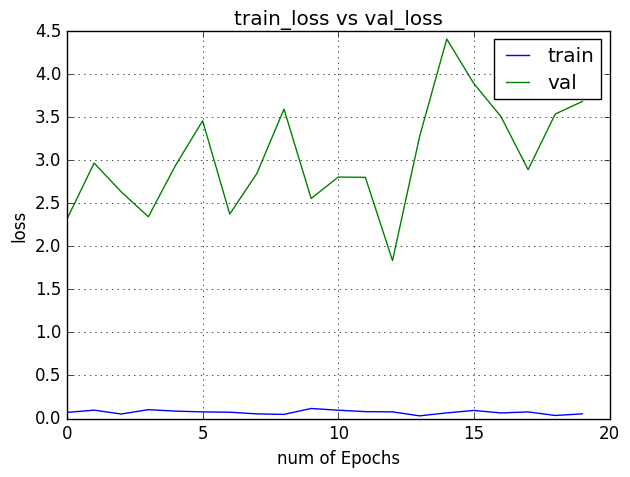

In [37]:
% matplotlib inline
# visualizing losses and accuracy
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']
xc = range(num_epoch)

plt.figure(1, figsize = (7,5))
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.show()

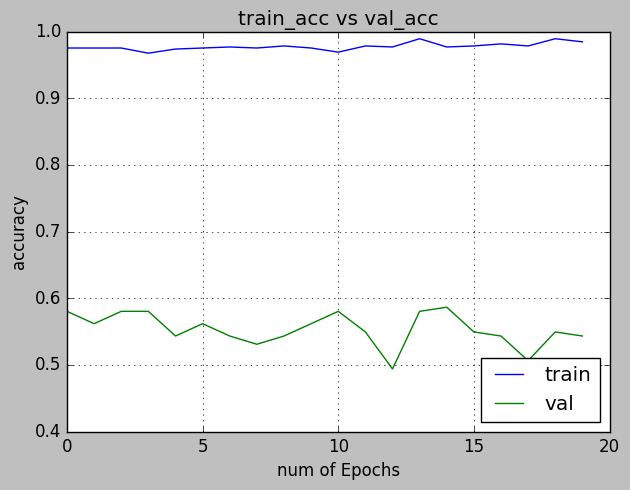

In [39]:
plt.figure(2, figsize = (7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'], loc = 4)
plt.style.use(['classic'])

## evaluating the model

In [51]:
score = model.evaluate(X_test,y_test,verbose = 0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

test_image = X_test[0:1]
print(test_image.shape)

print (model.predict(test_image))
print (model.predict_classes(test_image))
print (y_test[0:1])

# testing a new image
test_image = cv2.imread('dataimg/Humans/rider-8.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image = cv2.resize(test_image, (128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

# change the iamge dimension, so that it can feed into the model'
test_image = np.expand_dims(test_image, axis = 0)
test_image = np.expand_dims(test_image, axis =0)
### in case of tensorflow

# test_image = np.expand_dims(test_image, axis = 3)
# test_image = np.expand_dims(test_image, axis = 1)

print(model.predict(test_image))
print(model.predict_classes(test_image))

Test Loss 3.68210638305
Test accuracy 0.543209876543
(1, 1, 128, 128)
[[  3.27935995e-05   2.41182306e-07   9.98837292e-01   1.12969836e-03]]
1/1 [==============================] - 0s
[2]
[[ 0.  0.  1.  0.]]
(128, 128)
[[ 0.26249117  0.28600141  0.22338665  0.22812077]]
1/1 [==============================] - 0s
[1]


## visualizing the intermediate layer


In [52]:
def get_featuremaps(model, layer_idx, X_batch):
    """
    parameters: model, layer number, and input image
    """
    get_activations = K.function([model.layers[0].input, 
                                 K.learning_phase()],[model.layers[layer_idx].output,])
    activations = get_activations([X_batch,0])
    return activations

In [53]:
layer_num = 3
filter_num = 0
activations = get_featuremaps(model, int(layer_num), test_image)
print(np.shape(activations))  # (1,1,32,128,128)
feature_maps = activations[0][0]
print(np.shape(feature_maps)) # (32,128,128)

(1, 1, 32, 63, 63)
(32, 63, 63)


In [56]:
feature_maps = np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

(63, 63, 32)


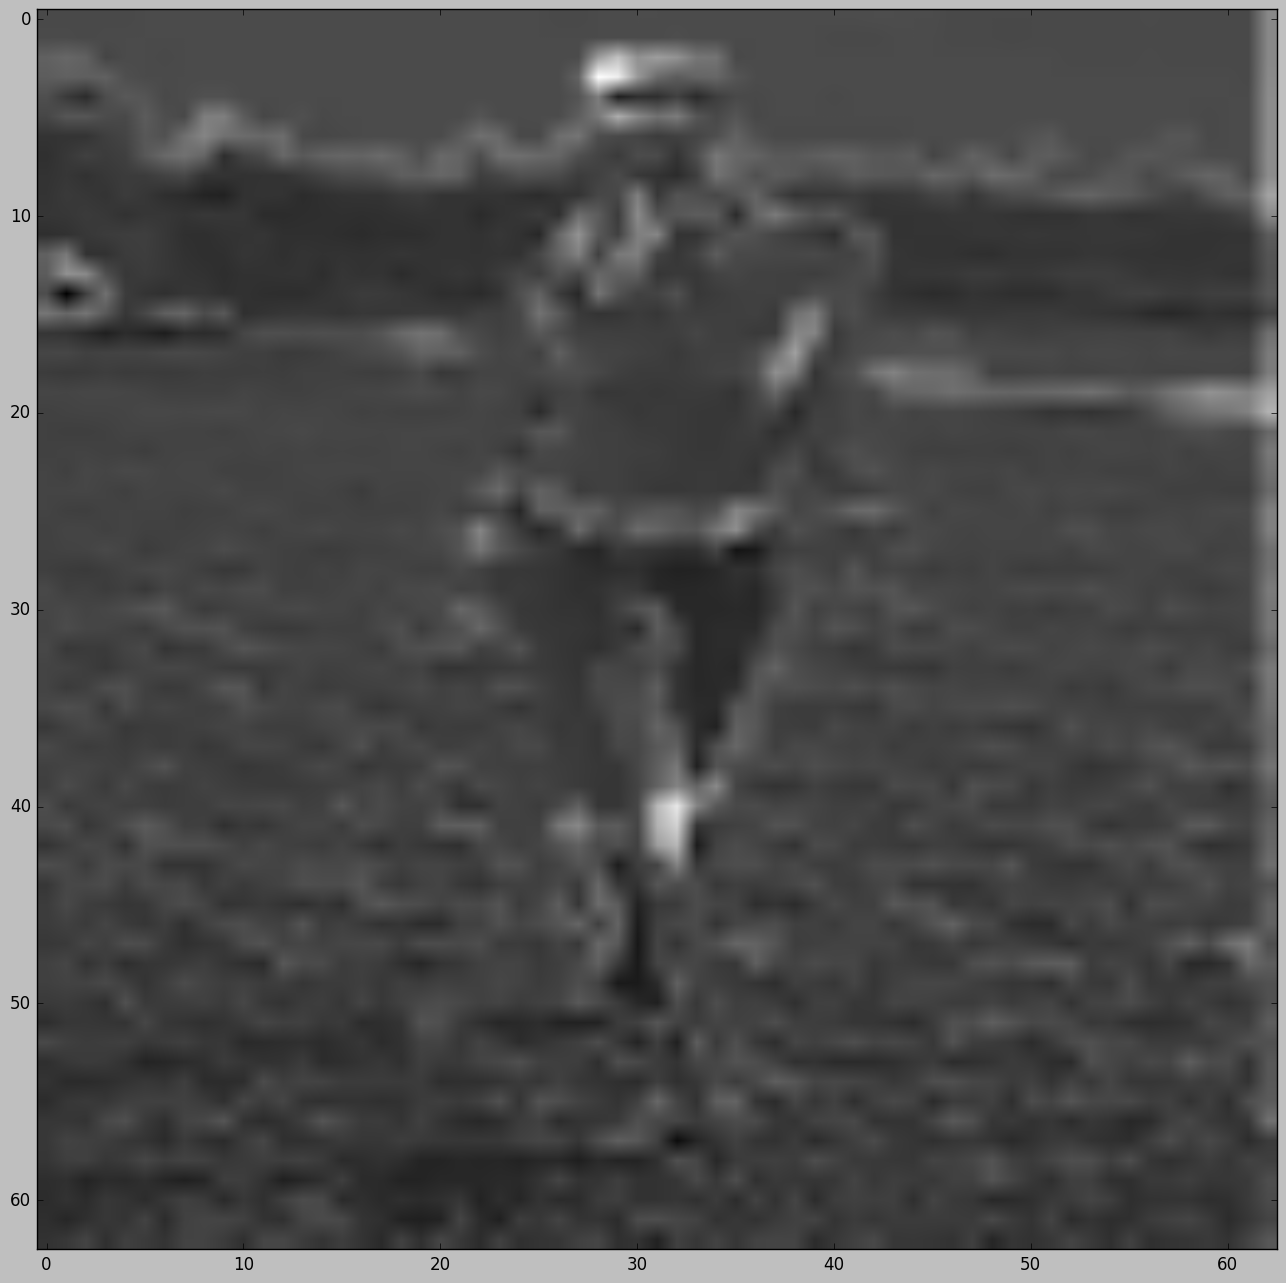

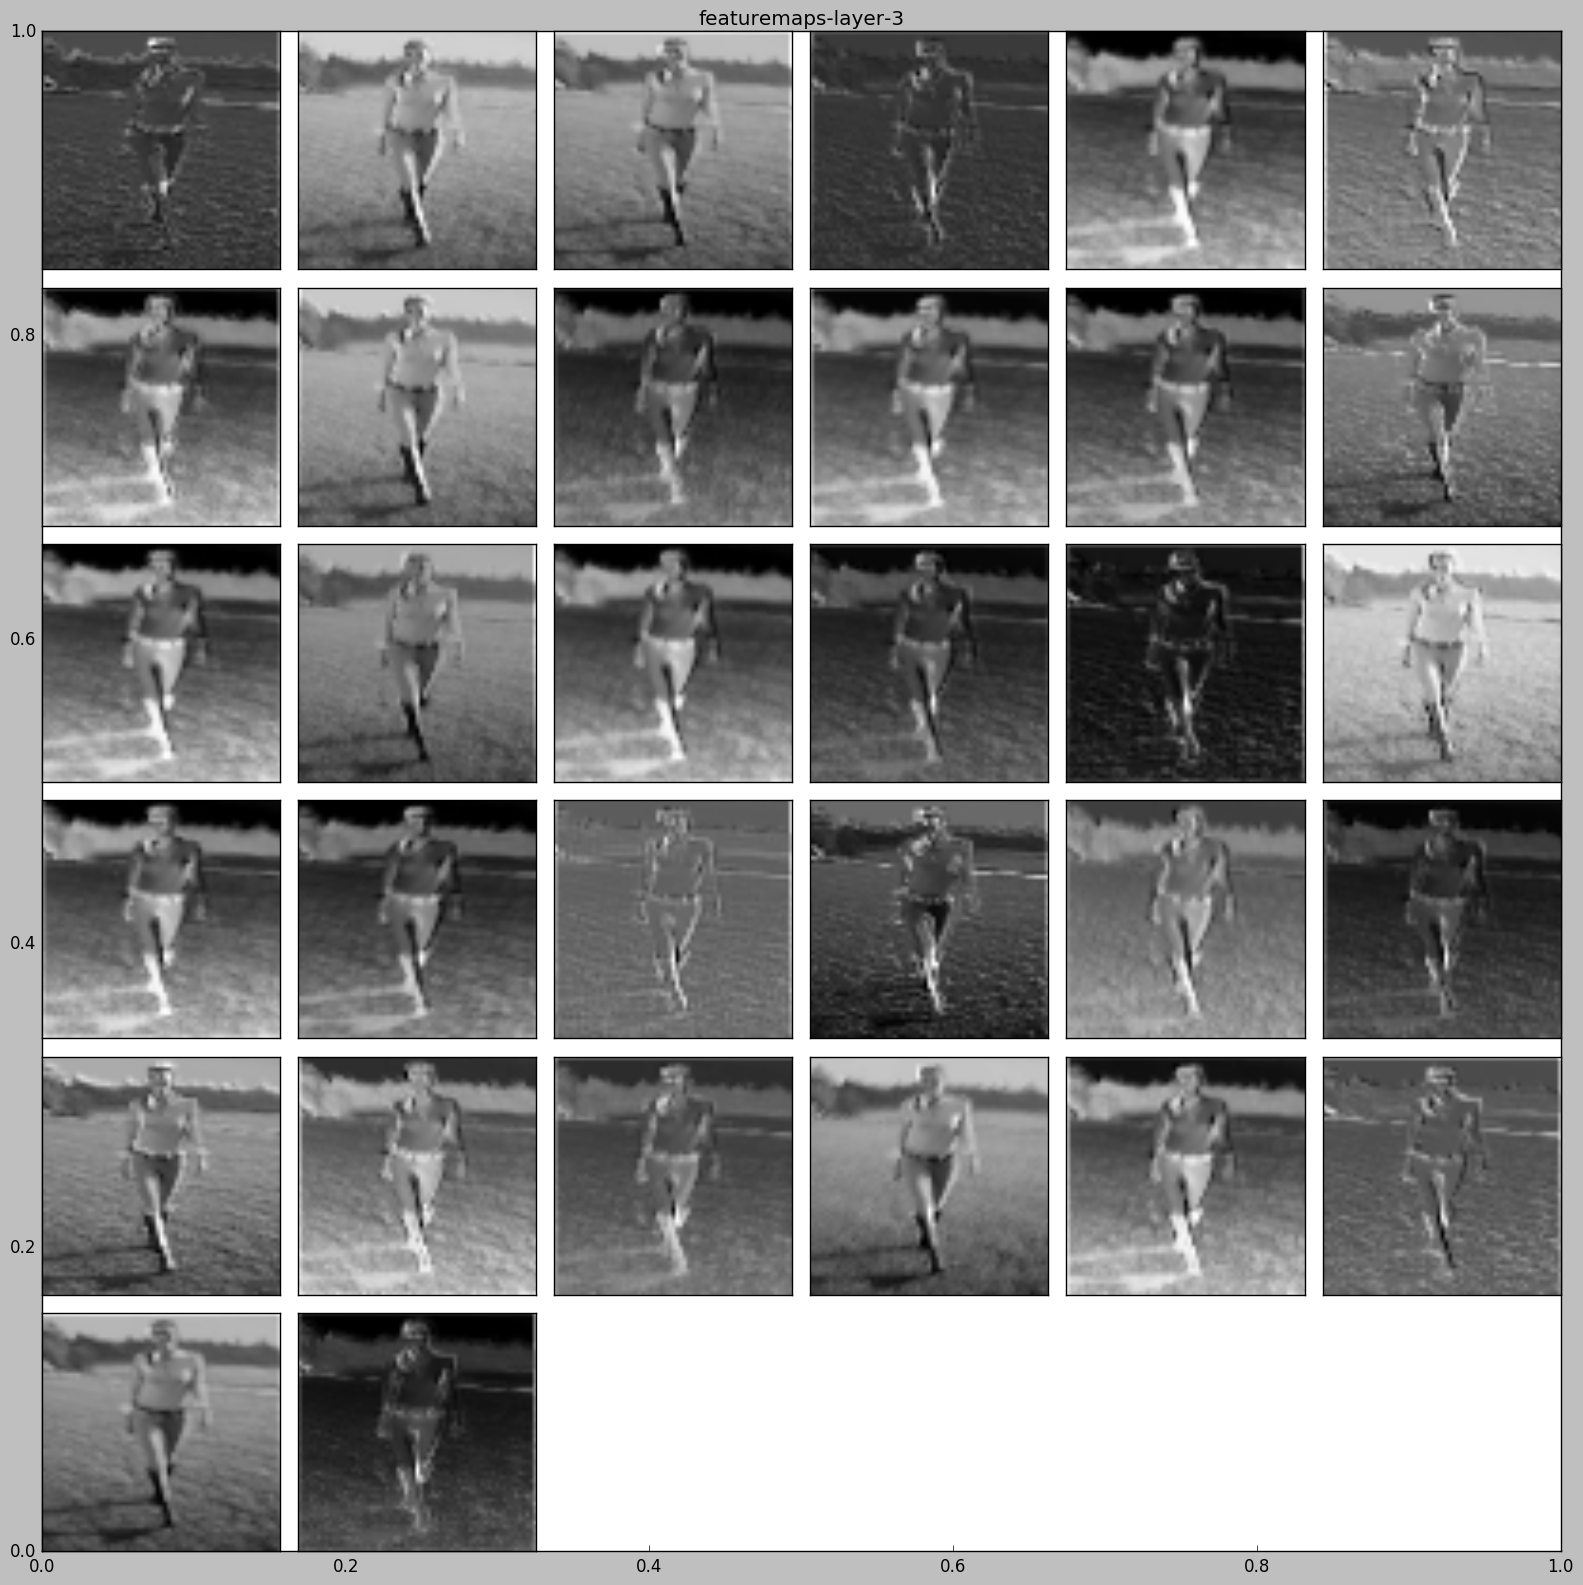

In [59]:
fig = plt.figure(figsize = (16,16))
plt.imshow(feature_maps[:,:,filter_num], cmap = 'gray')

num_of_featuremaps = feature_maps.shape[2]
fig = plt.figure(figsize = (16,16))
plt.title('featuremaps-layer-{}'.format(layer_num))
subplot_num = int(np.ceil(np.sqrt(num_of_featuremaps)))

for i in range(int(num_of_featuremaps)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    ax.imshow(feature_maps[:,:,i], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()



# print the confusion matrix

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred.shape)

y_pred = np.argmax(Y_pred, axis = 1)
print (y_pred)
target_names = ['class 0(cats)','class 1(dogs)', 'class 2(hourse)', 'class 3(humans)']
print (classification_report(np.argmax(y_test, axis = 1), y_pred, target_names = target_names))
print (confusion_matrix(np.argmax(y_test, axis = 1), y_pred))


(162, 4)
[2 2 2 1 2 2 3 2 2 3 2 3 3 3 2 2 2 2 3 2 3 3 2 2 3 2 2 3 1 2 2 2 2 2 2 3 3
 2 3 2 2 2 2 0 2 2 2 0 3 2 2 1 2 2 2 2 2 2 3 3 3 2 1 3 2 2 2 2 2 2 2 3 2 2
 0 2 1 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 3 2 2 3 2 2
 3 2 2 3 2 3 2 2 3 2 0 3 2 2 2 0 2 2 3 2 2 2 0 2 2 2 2 3 3 2 1 2 2 3 1 1 2
 3 2 2 0 0 3 2 2 3 2 2 2 3 2]
                 precision    recall  f1-score   support

  class 0(cats)       0.25      0.09      0.13        23
  class 1(dogs)       0.25      0.11      0.15        19
class 2(hourse)       0.55      0.81      0.65        72
class 3(humans)       0.65      0.54      0.59        48

    avg / total       0.50      0.54      0.50       162

[[ 2  4 15  2]
 [ 1  2 13  3]
 [ 4  1 58  9]
 [ 1  1 20 26]]


Confusion matrix without normalization
[[ 2  4 15  2]
 [ 1  2 13  3]
 [ 4  1 58  9]
 [ 1  1 20 26]]


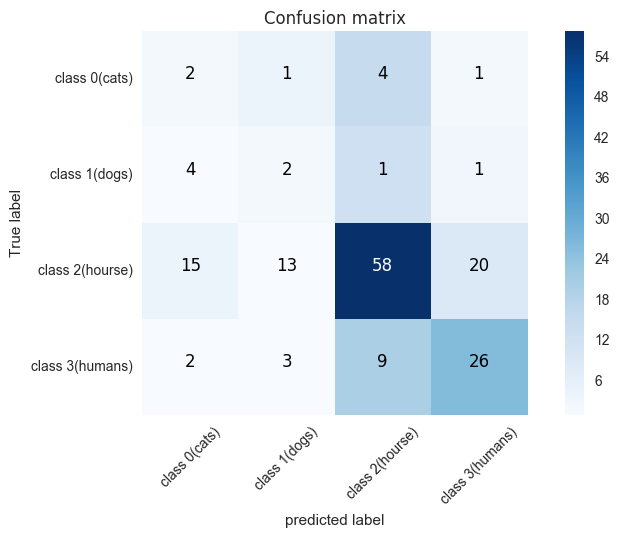

In [85]:
def plot_confusion_matrix(cm, classes, normalize = False, 
                          title = 'Confusion matrix', cmap = plt.cm.Blues):
    """
    This function prints and plots the cofnusion matrix 
    Normalization can be applied by setting 'normalize = True'
    """
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis =1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
    print(cm)
    
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), repeat = 2):
        plt.text(j,i,cm[i,j], horizontalalignment = 'center',
                color ='white' if cm[i,j] > thresh else 'black')
        
#         plt.text(j,i, cm[i,j]), for j, i is the coordinate of position
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('predicted label')
        
# compute the confusion matrix

cnf_matrix = (confusion_matrix(np.argmax(y_test,axis = 1), y_pred))
np.set_printoptions(precision = 2)

plt.figure()
# plot non-normalize confusion matrix
plot_confusion_matrix(cnf_matrix, classes = target_names,
                     title = 'Confusion matrix')
plt.grid(False)
plt.show()

    

In [84]:
for i, j in zip(range(cm.shape[0]), range(cm.shape[1])):
    print (i,j)
print ('我是分割线')    
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    print (i,j)

0 0
1 1
2 2
3 3
我是分割线
0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


## careful about the zip function and itertools.product()

## careful about the dimension of array --> (4,) and (4,1)

In [74]:


cm = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
print((cm.astype('float32') / cm.sum(axis = 1).reshape((4,1))) == (cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]))


print (cm.astype('float32') / cm.sum(axis = 1))

print(cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis])

print(cm.sum(axis = 1).shape)
print (cm.sum(axis = 1)[:, np.newaxis].shape)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[ 0.08695652  0.21052632  0.20833333  0.04166667]
 [ 0.04347826  0.10526316  0.18055556  0.0625    ]
 [ 0.17391304  0.05263158  0.80555556  0.1875    ]
 [ 0.04347826  0.05263158  0.27777778  0.54166667]]
[[ 0.08695652  0.17391304  0.65217391  0.08695652]
 [ 0.05263158  0.10526316  0.68421053  0.15789474]
 [ 0.05555556  0.01388889  0.80555556  0.125     ]
 [ 0.02083333  0.02083333  0.41666667  0.54166667]]
(4,)
(4, 1)


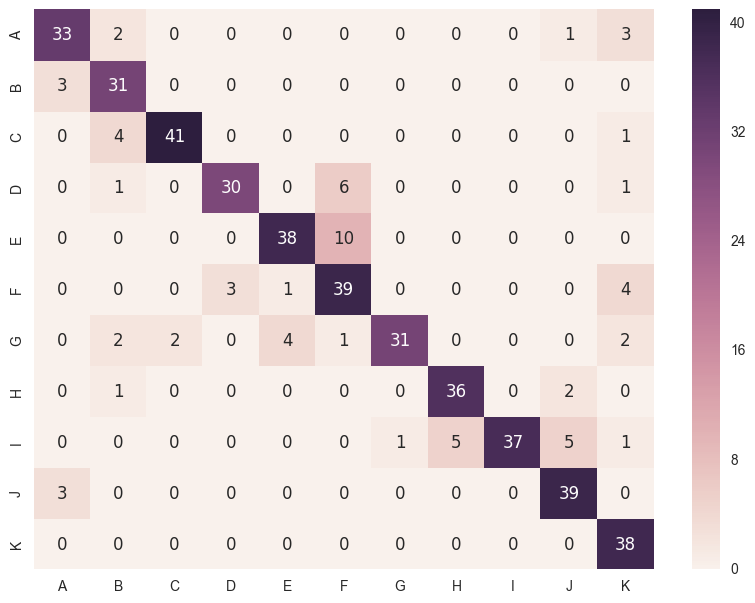

In [61]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[33,2,0,0,0,0,0,0,0,1,3], 
        [3,31,0,0,0,0,0,0,0,0,0], 
        [0,4,41,0,0,0,0,0,0,0,1], 
        [0,1,0,30,0,6,0,0,0,0,1], 
        [0,0,0,0,38,10,0,0,0,0,0], 
        [0,0,0,3,1,39,0,0,0,0,4], 
        [0,2,2,0,4,1,31,0,0,0,2],
        [0,1,0,0,0,0,0,36,0,2,0], 
        [0,0,0,0,0,0,1,5,37,5,1], 
        [3,0,0,0,0,0,0,0,0,39,0], 
        [0,0,0,0,0,0,0,0,0,0,38]]
df_cm = pd.DataFrame(array, index = [i for i in 'ABCDEFGHIJK'],
                  columns = [i for i in 'ABCDEFGHIJK'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [62]:
keras.backend.backend()

'theano'

In [3]:
import keras
print (keras.__version__)

2.0.6


## saving and loading model and weights


In [ ]:

from keras.models import model_from_json
from keras.models import load_model
# serialize model to JSON
model_json = model.to_json()
with open ('model.json', 'w') as json_file:
    json_file.write(model_json)
    
# Serialize weights to HDF5
model.save_weights('model.h5')
print ('save model to disk')

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# loaded weights into new model
loaded_model.load_weights('model.h5')
print ('loaded model from disk')
# alternative ways, much simpler
model.save('model.hdf5')
loaded_model = load_model('model.hdf5')

In [ ]:
print (keras.version.version())